# ML model-1 for the Breast Cancer Wisconsin (Diagnostic) dataset

# Shriram Yadav - 100951170

# Loading the libraries and Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=column_names)

In [10]:
# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [11]:
# Encode the target variable: M = 1 (malignant), B = 0 (benign)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Drop the ID column as it's not needed for the analysis
df = df.drop('ID', axis=1)

In [12]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Diagnosis', axis=1))

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:])
scaled_df['Diagnosis'] = df['Diagnosis']

# Display the first few rows of the scaled dataframe
print(scaled_df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.097064  -2.073335   1.269934   0.984375   1.568466   3.283515   
1   1.829821  -0.353632   1.685955   1.908708  -0.826962  -0.487072   
2   1.579888   0.456187   1.566503   1.558884   0.942210   1.052926   
3  -0.768909   0.253732  -0.592687  -0.764464   3.283553   3.402909   
4   1.750297  -1.151816   1.776573   1.826229   0.280372   0.539340   

   feature_7  feature_8  feature_9  feature_10  ...  feature_22  feature_23  \
0   2.652874   2.532475   2.217515    2.255747  ...   -1.359293    2.303601   
1  -0.023846   0.548144   0.001392   -0.868652  ...   -0.369203    1.535126   
2   1.363478   2.037231   0.939685   -0.398008  ...   -0.023974    1.347475   
3   1.915897   1.451707   2.867383    4.910919  ...    0.133984   -0.249939   
4   1.371011   1.428493  -0.009560   -0.562450  ...   -1.466770    1.338539   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0    2.001237    1.30

# Splitting the dataset into train and test

In [13]:
# Split the data
X = scaled_df.drop('Diagnosis', axis=1)
y = scaled_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("\nShape of the training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shape of the training and testing sets:
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


# Building and Training Model using Random Forest Classifier

In [14]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation

Accuracy: 0.96

Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



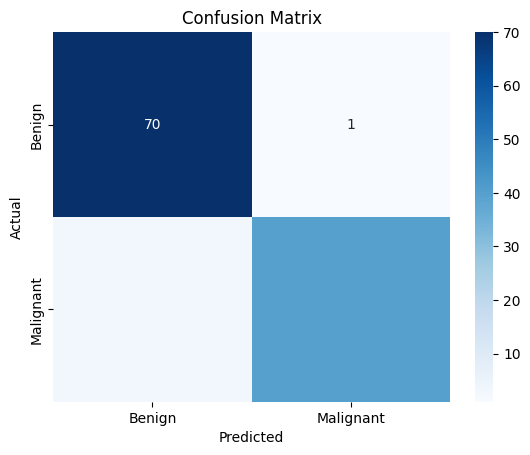

In [15]:
#calculate the accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()